In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import floor
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, roc_auc_score as AUC_score
from sklearn import preprocessing

from regression_problem import Regression
from neural_network import NeuralNetwork

mpl.rcdefaults()
plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18


parameter_names = ["Happiness", "Economy", "Family", "Health", "Freedom", "Trust", "Generosity"]
data_df = pd.read_pickle("../data/world_happiness.pickle")[parameter_names]
data = data_df.to_numpy()
output = data[:,0].reshape(-1,1)
input_data = data[:,1:]

hidden_neuron_list = [100,100]
epochs = 700
runs = 15
r2_test_runs = np.zeros((runs,epochs))
r2_train_runs = np.zeros((runs,epochs))
r2_end_test = np.zeros(runs)
r2_end_train = np.zeros(runs)
reg = Regression(hidden_activation='RELU')

etas = np.logspace(-5,-2,10)
lmbds = np.logspace(-2,2,10)
many_nns = np.zeros((len(etas),len(lmbds),runs),dtype=object)

for run in range(runs):
    print('run',run)
    for i,eta in tqdm(enumerate(etas)):
        for j,lmbd in enumerate(lmbds):
            X_train, X_test, Y_train, Y_test = train_test_split(input_data, output,test_size=0.2)
            Scaler = preprocessing.StandardScaler()
            X_train_scaled = Scaler.fit_transform(X_train)
            X_test_scaled = Scaler.transform(X_test)
            nn = NeuralNetwork( X_train_scaled,
                                Y_train,
                                problem=reg,
                                n_hidden_neurons_list=hidden_neuron_list,
                                n_output_neurons=1,
                                epochs=epochs,
                                batch_size=32,
                                eta=eta,
                                lmbd=lmbd,
                                debug=False)
            nn.SGD(track=['r2'],test_data=(X_test_scaled,Y_test),train_data=(X_train_scaled,Y_train),one_hot_encoding=False)
            many_nns[i,j,run] = nn

            r2_end_test[run] = nn.r2_test[-1]
            r2_end_train[run] = nn.r2_train[-1]





0it [00:00, ?it/s]

run 0






1it [00:55, 55.71s/it]



2it [01:54, 56.69s/it]



3it [02:52, 57.13s/it]



4it [03:50, 57.32s/it]



5it [04:47, 57.31s/it]



6it [06:00, 61.95s/it]



7it [06:59, 61.06s/it]



8it [08:00, 61.09s/it]



9it [09:08, 62.93s/it]



10it [10:25, 67.41s/it]



0it [00:00, ?it/s]

run 1






1it [01:02, 62.19s/it]



2it [01:58, 60.51s/it]



3it [02:54, 59.09s/it]



4it [03:51, 58.41s/it]



5it [04:57, 60.81s/it]



6it [05:55, 59.94s/it]



7it [06:52, 59.06s/it]



8it [07:52, 59.25s/it]



9it [09:03, 62.75s/it]



10it [10:18, 66.43s/it]



0it [00:00, ?it/s]

run 2






1it [00:58, 58.50s/it]



2it [01:56, 58.27s/it]



3it [02:53, 58.02s/it]



4it [03:50, 57.70s/it]



5it [04:55, 59.79s/it]



6it [05:57, 60.46s/it]



7it [06:54, 59.33s/it]



8it [07:54, 59.68s/it]



9it [09:01, 61.94s/it]



10it [10:18, 66.43s/it]



0it [00:00, ?it/s]

run 3






1it [00:58, 58.75s/it]



2it [01:57, 58.65s/it]



3it [02:55, 58.51s/it]



4it [03:59, 60.07s/it]



5it [05:00, 60.55s/it]



6it [05:56, 59.22s/it]



7it [06:53, 58.56s/it]



8it [07:58, 60.48s/it]



9it [09:21, 67.17s/it]



10it [10:26, 66.62s/it]



0it [00:00, ?it/s]

run 4






1it [00:58, 58.14s/it]



2it [01:56, 58.11s/it]



3it [02:53, 57.91s/it]



4it [03:55, 59.06s/it]



5it [04:59, 60.48s/it]



6it [05:54, 58.99s/it]



7it [06:50, 58.08s/it]



8it [07:51, 58.87s/it]



9it [09:12, 65.67s/it]



10it [10:21, 66.64s/it]



0it [00:00, ?it/s]

run 5






1it [00:59, 59.64s/it]



2it [01:57, 59.20s/it]



3it [02:58, 59.56s/it]



4it [04:00, 60.41s/it]



5it [04:57, 59.34s/it]



6it [05:53, 58.48s/it]



7it [06:50, 57.95s/it]



8it [07:58, 60.95s/it]



9it [09:08, 63.76s/it]



10it [10:14, 64.33s/it]



0it [00:00, ?it/s]

run 6






1it [00:58, 58.59s/it]



2it [01:55, 58.17s/it]



3it [02:52, 57.74s/it]



4it [04:08, 63.28s/it]



5it [05:05, 61.35s/it]



6it [06:02, 59.96s/it]



7it [07:00, 59.39s/it]



8it [08:05, 61.24s/it]



9it [09:20, 65.32s/it]



10it [10:27, 65.61s/it]



0it [00:00, ?it/s]

run 7






1it [01:00, 60.01s/it]



2it [01:58, 59.60s/it]



3it [03:09, 62.97s/it]



4it [04:06, 61.16s/it]



5it [05:03, 59.80s/it]



6it [06:00, 59.18s/it]



7it [07:00, 59.48s/it]



8it [08:09, 62.22s/it]



9it [09:14, 62.93s/it]



10it [10:18, 63.26s/it]



0it [00:00, ?it/s]

run 8






1it [01:00, 60.14s/it]



2it [01:59, 59.81s/it]



3it [03:14, 64.35s/it]



4it [04:12, 62.56s/it]



5it [05:09, 60.76s/it]



6it [06:05, 59.48s/it]



7it [07:04, 59.28s/it]



8it [08:15, 62.76s/it]



9it [09:20, 63.48s/it]



10it [10:24, 63.55s/it]



0it [00:00, ?it/s]

run 9






1it [00:59, 59.43s/it]



2it [02:08, 62.32s/it]



3it [03:08, 61.61s/it]



4it [04:05, 60.23s/it]



5it [05:01, 59.09s/it]



6it [05:58, 58.37s/it]



7it [07:09, 62.04s/it]



8it [08:11, 62.02s/it]



9it [09:20, 64.12s/it]



10it [10:27, 65.18s/it]



0it [00:00, ?it/s]

run 10






1it [00:59, 59.70s/it]



2it [02:05, 61.57s/it]



3it [03:07, 61.58s/it]



4it [04:05, 60.49s/it]



5it [05:03, 59.75s/it]



6it [06:00, 58.87s/it]



7it [07:08, 61.63s/it]



8it [08:08, 61.25s/it]



9it [09:15, 63.11s/it]



10it [10:21, 63.88s/it]



0it [00:00, ?it/s]

run 11






1it [01:06, 66.03s/it]



2it [02:07, 64.52s/it]



3it [03:04, 62.38s/it]



4it [04:02, 61.04s/it]



5it [05:00, 60.13s/it]



6it [06:06, 61.97s/it]



7it [07:05, 61.10s/it]



8it [08:06, 60.99s/it]



9it [09:13, 62.83s/it]



10it [10:20, 63.94s/it]



0it [00:00, ?it/s]

run 12






1it [01:11, 71.98s/it]



2it [02:17, 69.99s/it]



3it [03:15, 66.50s/it]



4it [04:13, 63.99s/it]



5it [05:11, 62.13s/it]



6it [06:19, 63.80s/it]



7it [07:16, 61.90s/it]



8it [08:17, 61.66s/it]



9it [09:23, 62.72s/it]



10it [10:36, 65.97s/it]



0it [00:00, ?it/s]

run 13






1it [01:05, 65.27s/it]



2it [02:03, 63.23s/it]



3it [03:01, 61.57s/it]



4it [03:58, 60.36s/it]



5it [05:04, 61.92s/it]



6it [06:03, 61.06s/it]



7it [07:01, 59.97s/it]



8it [08:01, 60.20s/it]



9it [09:06, 61.60s/it]



10it [10:17, 64.34s/it]



0it [00:00, ?it/s]

run 14






1it [01:13, 73.66s/it]



2it [02:11, 69.06s/it]



3it [03:09, 65.56s/it]



4it [04:06, 62.89s/it]



5it [05:12, 63.86s/it]



6it [06:12, 62.71s/it]



7it [07:09, 60.97s/it]



8it [08:09, 60.85s/it]



9it [09:19, 63.57s/it]



10it [10:39, 68.47s/it]

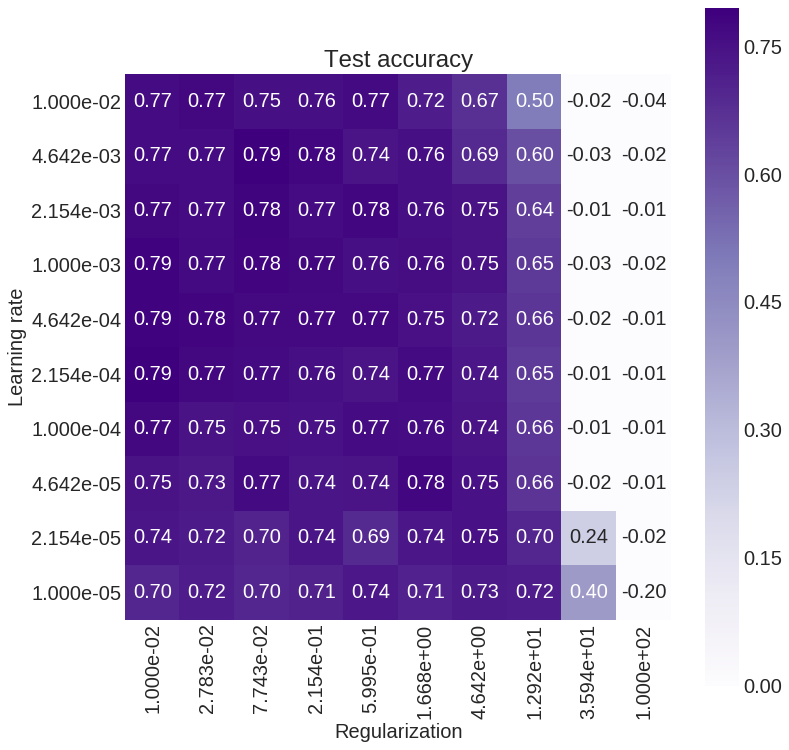

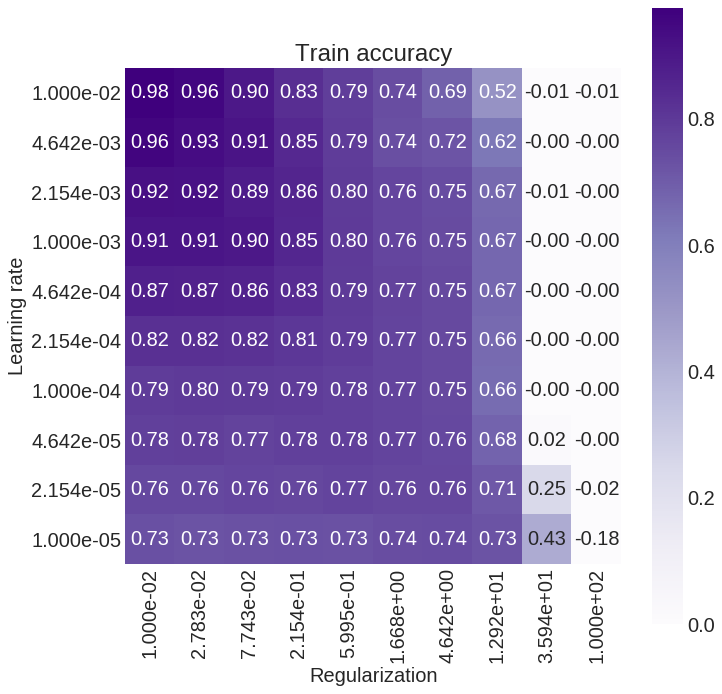

In [34]:
r2_end_test = np.zeros((len(etas),len(lmbds)))
r2_end_train = np.zeros_like(r2_end_test)
for i,eta in enumerate(etas):
    for j,lmbd in enumerate(lmbds):
        nn_runs = many_nns[i,j,:]
        test = 0
        train = 0
        for k in range(len(nn_runs)):
            test += nn_runs[k].r2_test[-1]
            train += nn_runs[k].r2_train[-1]
        test /= len(nn_runs)
        train /= len(nn_runs)

        r2_end_test[i,j] = test
        r2_end_train[i,j] = train

import seaborn as sns
etas_ticks = ['{:.3e}'.format(x) for x in etas]
lmbds_ticks = ['{:.3e}'.format(x) for x in lmbds]
fig,ax = plt.subplots(figsize=(11,11))
sns.heatmap(r2_end_test,annot=True,fmt='.2f',vmin=0,ax=ax,square=True,xticklabels=lmbds_ticks,yticklabels=etas_ticks,cmap='Purples')
ax.set_title('Test accuracy')
ax.set_ylabel('Learning rate')
ax.set_xlabel('Regularization')
plt.ylim(0,10)
fig.savefig('../figs/WH_self_heatmap_test.pdf') # Run with [100,100], 700 epochs, batch size 32 and 15 runs

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(r2_end_train,annot=True,fmt='.2f',vmin=0,ax=ax,square=True,xticklabels=lmbds_ticks,yticklabels=etas_ticks,cmap='Purples')
ax.set_title('Train accuracy')
ax.set_ylabel('Learning rate')
ax.set_xlabel('Regularization')
fig.savefig('../figs/WH_self_heatmap_train.pdf') # Run with [100,100], 700 epochs, batch size 32 and 15 runs
plt.ylim(0,10);